# PARAMETRIZAÇÃO COARE3.6 PARA O ATLÂNTICO

In [1]:
import pandas as pd
import numpy as np

In [3]:
#..............................................COARE 3.6.....................................................................................................

def coare36vn_zrf_et(u, zu , t, zt, rh, zq, P, ts, sw_dn, lw_dn, lat, lon,jd, zi,rain, Ss, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0):   
 
    jcoolx = 1 #pele fria ligada
    #jcoolx = 0 #cool skin desligada 

    #**********   Variavéis de ENTRADAS  ****************

        
    # Notas sobre valores padrão de entrada, valores ausentes, vetores versus valores únicos:

    # - o código assume que u,t,rh,ts,P,sw_dn,lw_dn,rain,Ss,cp,sigH são vetores;

    # - alturas do sensor (zu,zt,zl) latitude lat, longitude lon, data juliana jd,
    # e PBL altura zi podem ser constantes;

    # - pressão do ar P e radiação sw_dn, lw_dn podem ser vetores ou constantes.

    # - insira NaNs como vetores ou valores únicos para indicar que não há dados.

    # - atribui um valor padrão para P, lw_dn, sw_dn, lat, zi se desconhecido, único
    # valores dessas entradas estão ok.

    # Notas sobre sinais e unidades:
    # - sinais de radiação: positivo aquece o oceano
    # - sinais e unidades mudam ao longo do programa para facilitar os cálculos.
    # - os sinais e unidades indicados aqui são para as entradas.
        
        
    # u = magnitude da velocidade do vento relativa à água (m/s) na altura zu (m)
    # ou seja, a velocidade média do vento considerando o vetor de corrente oceânica.
    # ou seja, a magnitude da diferença entre o vetor vento
    # (na altura zu) e vetor de corrente de superfície oceânica.
    # Se não estiver disponível, use a velocidade real do vento para calcular os fluxos em
    # apenas coordenadas de terra que irão ignorar o estresse
    # contribuição da corrente oceânica para todos os fluxos

    # t = temperatura do ar (graus C) na altura zt (m)

    # rh = umidade relativa (#) na altura zq (m)

    # P = pressão atmosférica ao nível do mar (mb)

    # ts = temperatura da água do mar (degC), veja jcool abaixo para pele fria
    # cálculo e código de camada quente separado para especificar
    # profundidade do sensor e se a camada quente é calculada

    # sw_dn = radiação de ondas curtas descendente (positiva) (W/m^2)
    # lw_dn = radiação de onda longa descendente (positiva) (W/m^2)

    # lat = latitude definida positiva para o norte
    # lon = longitude definida positiva para leste, se estiver usando outra versão,
    # ajusta a entrada da string eorw para a função albedo_vector

    # jd = dia do ano ou dia juliano, onde dia 1 de janeiro 00:00 UTC = 0

    # zi = Altura PBL (m) (padrão ou valor típico = 600m)

    # chuva = taxa de chuva (mm/h)

    # Ss = salinidade da superfície do mar (PSU)

    # cp = velocidade de fase das ondas dominantes (m/s) calculada a partir do período de pico
    # sigH = altura significativa da onda (m)
    # zu, zt, zq alturas das observações (m)
    # zrf_u, zrf_t, zrf_q altura de referência para o perfil. Use isso para comparar observações em diferentes alturas
        



    #************ Variavéis de saída **************

    #### SAÍDAS: o usuário controla a matriz de saída A no final do código.
        
    # Nota sobre sinais e unidades:
    # - sinais de radiação: positivo aquece o oceano

    # - sinais de fluxo sensível, chuva e latente: positivo esfria o oceano
    # - sinais e unidades mudam ao longo do programa para facilitar os cálculos.
    # - os sinais e unidades indicados aqui são para as saídas finais.
        
    # usr = velocidade de fricção que inclui rajadas (m/s), u*
    # tau = tensão do vento que inclui rajadas (N/m^2)

    # hsb = fluxo de calor sensível (W/m^2) ... positivo para Tair < Tskin
    # hlb = fluxo de calor latente (W/m^2) ... positivo para qair < qs

    # hbb = fluxo de empuxo atmosférico (W/m^2)... positivo quando hlb e hsb aquecem a atmosfera
    # hsbb = fluxo de empuxo atmosférico do sônico ... como acima, calculado com anemômetro sônico T
    # hlwebb = fator webb a ser adicionado à covariância hl e fluxos de calor latente ID
    # tsr = parâmetro de escala de temperatura (K), t*
    # qsr = parâmetro de escala de umidade específica (kg/kg), q*
    # zo = comprimento de rugosidade do momento (m)
    # zot = comprimento de rugosidade térmica (m)
    # zoq = comprimento de rugosidade de umidade (m)
    # Cd = coeficiente de transferência (arrasto) da tensão do vento na altura zu (sem unidade)
    # Ch = coeficiente de transferência de calor sensível (número de Stanton) na altura zu (sem unidade)
    # Ce = coeficiente de transferência de calor latente (número de Dalton) na altura zu (sem unidade)
    # L = escala de comprimento de Monin-Obukhov (m)
    # zeta = Parâmetro de estabilidade Monin-Obukhov zu/L (adimensional)
    # dT_skin = depressão da temperatura da pele fria (degC), valor pos significa que a pele é mais fria que a subpele
    # dq_skin = depressão da umidade da pele fria (g/kg)
    # dz_skin = espessura da pele fria (m)
    # Urf = velocidade do vento na altura de referência (o usuário pode selecionar a altura na entrada)
    # Trf = temperatura do ar na altura de referência
    # Qrf = umidade específica do ar na altura de referência
    # RHrf = umidade relativa do ar na altura de referência
    # UrfN = valor neutro da velocidade do vento na altura de referência
    # TrfN = valor neutro da temperatura do ar na altura de referência
    # qarfN = valor neutro da umidade específica do ar na altura de referência
    # lw_net = radiação infravermelha líquida calculada por COARE (W/m2)... aquecimento positivo do oceano
    # sw_net = Radiação solar líquida calculada por COARE (W/m2)... aquecimento positivo do oceano
    # Le = calor latente de vaporização (J/K)
    # rhoa = densidade do ar na altura do parâmetro de entrada zt, normalmente igual a zq (kg/m3)
    # UN = valor neutro da velocidade do vento em zu (m/s)
    # U10 = velocidade do vento ajustada para 10 m (m/s)
    # UN10 = valor neutro da velocidade do vento a 10m (m/s)
    # Cdn_10 = valor neutro do coeficiente de arrasto a 10m (sem unidade)
    # Chn_10 = valor neutro do número de Stanton a 10m (sem unidade)
    # Cen_10 = valor neutro do número de Dalton a 10m (sem unidade)
    # hrain = fluxo de calor da chuva (W/m^2)... oceano de resfriamento positivo
    # Qs = umidade específica da superfície do mar, ou seja, assumindo a saturação (g/kg)
    # Evap = taxa de evaporação (mm/h)
    # T10 = temperatura do ar a 10m (graus C)
    # Q10 = umidade específica do ar a 10m (g/kg)
    # RH10 = umidade relativa do ar a 10m (#)
    # P10 = pressão do ar a 10m (mb)
    # rhoa10 = densidade do ar a 10m (kg/m3)
    # rajada = velocidade de rajada (m/s)
    # wc_frac = fração whitecap (razão)
    # Edis = energia dissipada pela quebra da onda (W/m^2)



    #****  preparação dos dados de entrada ****************
    
    if u.size ==1 and t.size ==1: 
        u = np.copy(np.asarray([u], dtype=float)).flatten()
        zu = np.copy(np.asarray([zu], dtype=float)).flatten()
        t = np.copy(np.asarray([t], dtype=float)).flatten()
        zt = np.copy(np.asarray([zt], dtype=float)).flatten()
        rh = np.copy(np.asarray([rh], dtype=float)).flatten()
        zq = np.copy(np.asarray([zq], dtype=float)).flatten()
        P = np.copy(np.asarray([P], dtype=float)).flatten()
        ts = np.copy(np.asarray([ts], dtype=float)).flatten()
        sw_dn = np.copy(np.asarray([sw_dn], dtype=float)).flatten()
        lw_dn = np.copy(np.asarray([lw_dn], dtype=float)).flatten()
        lat = np.copy(np.asarray([lat], dtype=float)).flatten()
        lon = np.copy(np.asarray([lon], dtype=float)).flatten()
        jd = np.copy(np.asarray([jd], dtype=float)).flatten()
        zi = np.copy(np.asarray([zi], dtype=float)).flatten()
        rain = np.copy(np.asarray([rain], dtype=float)).flatten()
        Ss = np.copy(np.asarray([Ss], dtype=float)).flatten()
        zrf_u = np.copy(np.asarray([zrf_u], dtype=float)).flatten()
        zrf_t = np.copy(np.asarray([zrf_t], dtype=float)).flatten()
        zrf_q = np.copy(np.asarray([zrf_q], dtype=float)).flatten()
    
    N = np.size(u)
    jcool = jcoolx * np.ones(N)
    
    if cp is not None and cp.size==1:
        cp = np.copy(np.asarray([cp], dtype=float)).flatten()
    elif cp is None:
        cp = np.nan * np.ones(N)

    if sigH is not None and sigH.size==1:
        sigH = np.copy(np.asarray([sigH], dtype=float)).flatten()
    elif sigH is None:
        sigH = np.nan * np.ones(N)
     
    us = 0 * u

    # converter rh em umidade específica após contabilizar o efeito do sal no congelamento**********
    # ponto de água

    Tf = - 0.0575 * Ss + 0.00171052 * Ss ** 1.5 - np.multiply(0.0002154996 * Ss,Ss)
    Qs = qsat26sea(ts,P,Ss,Tf) / 1000
    P_tq = P - (0.125 * zt)
    Q,Pv = qsat26air(t,P_tq,rh)
    
    # Assume rh relativo ao gelo T<0
    # Pv é a pressão parcial devido ao vapor de água em mb*************

    Q = Q / 1000

    ice = np.zeros(N)
    iice = np.array(np.where(ts < Tf))
    ice[iice] = 1
    jcool[iice] = 0
    zos = 0.0005
    #****  Escolhendo constantes ********************
    zref = 10
    Beta = 1.2
    von = 0.4
    fdg = 1.0
    T2K = 273.16
    grav = grv(lat)
    #****  Constantes relacionadas a atmosféra ****************
    Rgas = 287.1
    Le = (2.501 - 0.00237 * ts) * 1000000.0
    cpa = 1004.67
    cpv = cpa * (1 + 0.84 * Q)
    rhoa = P_tq * 100.0 / (np.multiply(Rgas * (t + T2K),(1 + 0.61 * Q)))

    # Pv is the partial pressure due to wate vapor in mb*****************
    rhodry = (P_tq - Pv) * 100.0 / (Rgas * (t + T2K))
    visa = 1.326e-05 * (1 + np.multiply(0.006542,t) + 8.301e-06 * t * 2 - 4.84e-09 * t * 3)
    lapse = grav / cpa
    
    #****  cool skin constantes  **************
    ### inclui coeficiente de expansão térmica dependente de salinidade para água
    tsw = ts
    ii = np.array(np.where(ts < Tf))
    if np.size(ii) != 0:
        tsw[ii] = Tf[ii]
    Al35 = 2.1e-05 * (tsw + 3.2) ** 0.79
    # Al0 = (2.2 * real((tsw - 1) ** 0.82) - 5) * 1e-05
    Al0_i=(tsw - 1) ** 0.82
    Al0 = (2.2 * Al0_i.real - 5) * 1e-05
    Al = Al0 + np.multiply((Al35 - Al0),Ss) / 35
    ###################
    bets = 0.00075
    be = bets * Ss
    ####  Equação retirada do "Computing the seater expansion coefficients directly from the
    ####  1980 equation of state".  J. Lillibridge, J.Atmos.Oceanic.Tech, 1980.
    cpw = 4000
    rhow = 1022
    visw = 1e-06
    tcw = 0.6
    bigc = 16 * grav * cpw * (rhow * visw) * 3.0 / (tcw * 2 * rhoa ** 2)
    wetc = np.multiply(0.622 * Le,Qs) / (Rgas * (ts + T2K) ** 2)

    #****  fluxos líquidos de radiação solar e IR **********
    ### fluxo solar líquido, também conhecido como sw, também conhecido como onda curta
    
    # * para variação no tempo, ou seja, ângulo zenital variando albedo usando Payne 1972:
    # insira 'E' para inserir a função albedo se a longitude for definida como positiva
    # para E (normal), neste caso o sinal lon será invertido para o cálculo.
    # Caso contrário, especifique 'W' e o sinal não será alterado na função.
    # Verifique: o albedo geralmente deve atingir o pico ao nascer do sol e não ao pôr do sol, embora possa
    # varia com base em sw_dn.

    alb,T_sw,solarmax_sw,psi_sw = albedo_vector(sw_dn,jd,lon,lat,eorw='E')
    sw_net = np.multiply((1 - alb),sw_dn)
    
    # * para albedo constante:
    # sw_net = 0.945.*sw_dn; # correção de albedo constante, oceano de aquecimento positivo
    
    ### net longwave também conhecido como IR ou infravermelho
    # valor inicial aqui é positivo para resfriamento do oceano nos cálculos
    # abaixo. No entanto, é retornado no final do programa como -lw_net na saída final, portanto
    # que é oceano de aquecimento positivo como os outros valores de radiação de entrada.

    lw_net = 0.97 * (5.67e-08 * (ts - 0.3 * jcool + T2K) ** 4 - lw_dn)

    #****  Inicio do bulk loop ****************
    
    #****  first guess ******************
    
    # Velocidade do vento menos a velocidade atual
    du = u - us

    # diferença de temperatura do ar e do mar para fins de fluxo de calor sensível
    dT = ts - t - np.multiply(lapse,zt)

    # ir-sea T diff deve levar em consideração a taxa de lapso entre a superfície e a altura do instrumento
    # t é a temperatura do ar em C, ts é a temperatura da água na superfície em C. dT é uma aproximação que é equivalente a dtheta onde theta é o
    #temperatura potencial e pressão no nível do mar e no nível do instrumento
    # são usados. Eles são equivalentes (diferença máxima = 0,0022 K). Por aqui
    # elimina a necessidade de envolver as pressões em diferentes alturas.
    # Usando ou assumindo a taxa de lapso adiabático seco entre as duas alturas
    # não importa porque se forem usadas pressões reais, o resultado é o
    # inalterado. O dT também não precisa incluir a conversão para K. Aqui está um exemplo:
    # grav = grv(lat);
    # lapso=grav/cpa;
    # P_at_tq_height=(psealevel - (0.125*zt)); # P na altura de medição tq (mb)
    # note psealevel é ajustado usando a mesma expressão de pa height
    # Ta está originalmente em C e C2K = 273,15 para converter de C para K
    # theta = (b10.Ta+C2K).*(1000./P_tq).^(Rgas/cpa);
    # TadjK = (b10.Ta+C2K) + lapso*zt;
    # Tadj = b10.Ta + lapso*zt;
    # theta_sfc = (b10.Tskin+C2K).*(1000./b10.psealevel).^(Rgas/cpa);
    # TadjK_sfc = b10.Tskin+C2K;
    # Tadj_sfc = b10.Tskin;
        
    ### as versões adj são apenas 0,0022 K menores que as versões teta)
    # dtheta = theta_sfc - theta;
    # dTadjK = TadjK_sfc - TadjK;
    # dTadj = Tadj_sfc - Tadj; # então dT = Tskin - (Ta + lapso*zt) ​​= Tskin - Ta - lapso*zt
        
    # coloque as coisas em diferentes unidades e expressões para mais cálculos,
    # incluindo as primeiras suposições que são refeitas mais tarde

    dq = Qs - Q
    ta = t + T2K
    tv = np.multiply(ta,(1 + 0.61 * Q))
    gust = 0.5
    dT_skin = 0.3
    ut = np.sqrt(du * 2 + gust * 2)
    u10 = np.multiply(ut,np.log(10 / 0.0001)) / np.log(zu / 0.0001)
    usr = 0.035 * u10
    zo10 = 0.011 * usr ** 2.0 / grav + 0.11 * visa / usr
    Cd10 = (von / np.log(10.0 / zo10)) ** 2
    Ch10 = 0.00115
    Ct10 = Ch10 / np.sqrt(Cd10)
    zot10 = 10.0 / np.exp(von / Ct10)
    Cd = (von / np.log(zu / zo10)) ** 2
    Ct = von / np.log(zt / zot10)
    CC = von * Ct / Cd
    Ribcu = - zu / zi / 0.004 / Beta ** 3
    Ribu = np.multiply(np.multiply(- grav,zu) / ta,((dT - np.multiply(dT_skin,jcool)) + np.multiply(0.61 * ta,dq))) / ut ** 2
    zetau = np.multiply(np.multiply(CC,Ribu),(1 + 27 / 9 * Ribu / CC))
    k50 = np.array(np.where(zetau > 50))
    
    k = np.array(np.where(Ribu < 0))
    if np.size(Ribcu) == 1:
        zetau[k] = np.multiply(CC[k],Ribu[k]) / (1 + Ribu[k] / Ribcu)
        del k
    else:
        zetau[k] = np.multiply(CC[k],Ribu[k]) / (1 + Ribu[k] / Ribcu[k])
        del k
    
    L10 = zu / zetau
    gf = ut / du
    usr = np.multiply(ut,von) / (np.log(zu / zo10) - psiu_40(zu / L10))
    tsr = np.multiply(- (dT - np.multiply(dT_skin,jcool)),von) * fdg / (np.log(zt / zot10) - psit_26(zt / L10))
    qsr = - (dq - np.multiply(np.multiply(wetc,dT_skin),jcool)) * von * fdg / (np.log(zq / zot10) - psit_26(zq / L10))
    dz_skin = 0.001 * np.ones(N)


    #********************
    #  Nova formulação para a variavél de Charnock 
    #********************
    #############   COARE 3.5 wind speed dependent charnock
    charnC = 0.011 * np.ones(N)
    umax = 19
    a1 = 0.0017
    a2 = - 0.005
    # charnC = a1 * u10 + a2
    charnC=np.copy(np.asarray(a1 * u10 + a2, dtype=float))
    k = np.array(np.where(u10 > umax))
    if k.size!=0:
        charnC[k] = a1 * umax + a2
    #########   Se a idade da onda for fornecida, mas não a altura da onda, use parâmetros parametrizados
    #########   Altura da onda baseada na velocidade do vento

    hsig = np.multiply((0.02 * (cp / u10) * 1.1 - 0.0025),u10 * 2)
    hsig = np.maximum(hsig,0.25)
    ii = np.array(np.where(np.logical_and(np.logical_not(np.isnan(cp)) ,np.isnan(sigH))))
    if ii.size!=0:
        sigH[ii] = hsig[ii]
    Ad = 0.2
    #Ad=0.73./sqrt(u10);
    Bd = 2.2
    zoS = np.multiply(np.multiply(sigH,Ad),(usr / cp) ** Bd)
    charnS = np.multiply(zoS,grav) / usr / usr
    nits = 10
    
    charn = np.copy(charnC)  # cria uma cópia profunda de charnC - se a cópia rasa (= somente) charnC pode mudar muito abaixo!
    ii = np.array(np.where(np.logical_not(np.isnan(cp))))
    charn[ii] = charnS[ii]


    #*****  bulk loop *****************
    
    for i in np.arange(1,nits+1).reshape(-1):
        zeta = np.multiply(np.multiply(np.multiply(von,grav),zu) / ta,(tsr + np.multiply(0.61 * ta,qsr))) / (usr ** 2)
        L = zu / zeta
        zo = np.multiply(charn,usr ** 2.0) / grav + 0.11 * visa / usr
        zo[iice] = zos
        rr = np.multiply(zo,usr) / visa
        rt = np.zeros(u.size)
        rq = np.zeros(u.size)
        zoq = np.minimum(0.00016,5.8e-05 / rr ** 0.72)
        ik = np.array(np.where(rr[iice] <= 0.135))
        rt[iice[ik]] = rr[iice[ik]] * np.exp(1.25)
        rq[iice[ik]] = rr[iice[ik]] * np.exp(1.61)
        ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
        rt[iice[ik]] = np.multiply(rr[iice[ik]],np.exp(0.149 - 0.55 * np.log(rr[iice[ik]])))
        rq[iice[ik]] = np.multiply(rr[iice[ik]],np.exp(0.351 - 0.628 * np.log(rr[iice[ik]])))
        ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
        rt[iice[ik]] = np.multiply(rr[iice[ik]],np.exp(0.317 - 0.565 * np.log(rr[iice[ik]]) - np.multiply(0.183 * np.log(rr[iice[ik]]),np.log(rr[iice[ik]]))))
        rq[iice[ik]] = np.multiply(rr[iice[ik]],np.exp(0.396 - 0.512 * np.log(rr[iice[ik]]) - np.multiply(0.18 * np.log(rr[iice[ik]]),np.log(rr[iice[ik]]))))
        zot = zoq
        cdhf = von / (np.log(zu / zo) - psiu_26(zu / L))
        cqhf = np.multiply(von,fdg) / (np.log(zq / zoq) - psit_26(zq / L))
        cthf = np.multiply(von,fdg) / (np.log(zt / zot) - psit_26(zt / L))
        usr = np.multiply(ut,cdhf)
        qsr = np.multiply(- (dq - np.multiply(np.multiply(wetc,dT_skin),jcool)),cqhf)
        tsr = np.multiply(- (dT - np.multiply(dT_skin,jcool)),cthf)
        tvsr1 = tsr + np.multiply(0.61 * ta,qsr)
        tssr1 = tsr + np.multiply(0.51 * ta,qsr)
        
        
     
        #novo fluxo de flutuabilidade da versão COARE de Stull (1988) página 146
        # tsr aqui usa dT com o ajuste da taxa de lapso (veja o código acima). O
        # Os valores de Q e ta devem estar na altura de medição, não em alturas ajustadas

        tvsr = np.multiply(tsr,(1 + np.multiply(0.61,Q))) + np.multiply(0.61 * ta,qsr)
        tssr = np.multiply(tsr,(1 + np.multiply(0.51,Q))) + np.multiply(0.51 * ta,qsr)
        Bf = np.multiply(np.multiply(- grav / ta,usr),tvsr)
        gust = 0.2 * np.ones(N)
        k = np.array(np.where(Bf > 0))
        
        ### gustiness desta forma é do código original. Notas:
        # medimos a rajada real medindo a variância do
        # velocidade do vento e derivada empiricamente do escalonamento. é empírico
        # mas parece apropriado... quanto maior a média de tempo, maior
        # o fator de rajada deve ser, para contabilizar a média de rajada
        # ou suavizado pela média. wstar é a velocidade convectiva.
        # gustiness é beta vezes wstar. rajada é diferente entre a média de
        # velocidade e quadrado da média dos componentes do vetor velocidade.
        # O vento real (média + flutuações) ainda é o mais relevante
        # para o fluxo. Os modelos fazem u v w e, em seguida, calculam o vetor médio para obter
        # velocidade, então fizemos a mesma coisa. entrada coare alg é a magnitude
        # do vento vetorial médio em relação à água.

        if np.size(zi) == 1:
            gust[k] = Beta * (np.multiply(Bf[k],zi)) ** 0.333
            del k
        else:
            gust[k] = Beta * (np.multiply(Bf[k],zi[k])) ** 0.333
            del k
        ut = np.sqrt(du * 2 + gust * 2)
        gf = ut / du
        hsb = np.multiply(np.multiply(- rhoa * cpa,usr),tsr)
        hlb = np.multiply(np.multiply(np.multiply(- rhoa,Le),usr),qsr)
        qout = lw_net + hsb + hlb

        ### O fluxo de calor da chuva não está incluído em qout porque não
        # entenda a evolução ou gradiente da camada de pele fria no
        # presença de chuva e entrada de medição subsuperficial da serpente marinha
        # valor já capturará parte da água resfriada pela chuva. TBD.
        
        
        ### absorção solar:
        # A função de absorção abaixo é de um artigo de Soloviev, aparece como
        # Eq. 17 Fairall et al. 1996 e atualizado/testado por Wick et al. 2005. O
        # coeficiente foi alterado de 1,37 para 0,065 ~ cerca de metade.
        # Na maioria das vezes, esse ajuste não faz diferença. Mas aí
        # são momentos em que o vento é fraco, a insolação é alta e importa muito
        # muito. Usar o coeficiente original de 1,37 resultou em muitos
        # peles quentes que não pareciam realistas. Ver Wick et al. 2005 para detalhes.
        # Essa é a última vez que a rotina de pele fria foi atualizada. O
        # a absorção não é da Paulson & Simpson porque foi obtida em laboratório.
        # Absorveu demais e produziu muitas camadas quentes. É provável
        # Absorção muito aproximada de infravermelho próximo (solar de comprimento de onda mais longo)
        # que provavelmente não chega ao oceano já que provavelmente foi absorvido
        # primeiro em algum lugar da atmosfera. A expressão abaixo poderia
        # provavelmente use 2 exponenciais se você tiver uma camada mista rasa...
        # mas encontramos melhores resultados com 3 exponenciais. Isso é o melhor então
        # longe que descobrimos que cobre as profundidades possíveis.

        dels = np.multiply(sw_net,(0.065 + 11 * dz_skin - np.multiply(6.6e-05 / dz_skin,(1 - np.exp(- dz_skin / 0.0008)))))
        qcol = qout - dels
        # só precisa de estresse, temperatura da água, soma de sensível, latente, ir, solar,
        # e latente individualmente.
    
        alq = np.multiply(Al,qcol) + np.multiply(np.multiply(be,hlb),cpw) / Le
        xlamx = 6.0 * np.ones(N)
        

        # a outra é a parte da salinidade causada pelo fluxo de calor latente (evapor) deixando para trás o sal.
        dz_skin = np.minimum(0.01,np.multiply(xlamx,visw) / (np.multiply(np.sqrt(rhoa / rhow),usr)))
        k = np.array(np.where(alq > 0))
        xlamx[k] = 6.0 / (1 + (np.multiply(bigc[k],alq[k]) / usr[k] * 4) * 0.75) ** 0.333
        dz_skin[k] = np.multiply(xlamx[k],visw) / (np.multiply(np.sqrt(rhoa[k] / rhow),usr[k]))
        del k
        dT_skin = np.multiply(qcol,dz_skin) / tcw
        dq_skin = np.multiply(wetc,dT_skin)
        lw_net = 0.97 * (5.67e-08 * (ts - np.multiply(dT_skin,jcool) + T2K) ** 4 - lw_dn)
        if i == 1:
            usr50 = usr[k50]
            tsr50 = tsr[k50]
            qsr50 = qsr[k50]
            L50 = L[k50]
            zeta50 = zeta[k50]
            dT_skin50 = dT_skin[k50]
            dq_skin50 = dq_skin[k50]
            tkt50 = dz_skin[k50]
        u10N = np.multiply(usr / von / gf,np.log(10.0 / zo))
        charnC = a1 * u10N + a2
        k = u10N > umax
        charnC[k] = a1 * umax + a2
        charn = charnC
        zoS = np.multiply(np.multiply(sigH,Ad),(usr / cp) ** Bd)
        charnS = np.multiply(zoS,grav) / usr / usr
        ii = np.array(np.where(np.logical_not(np.isnan(cp))))
        charn[ii] = charnS[ii]
    
    # end bulk loop
    
    # insira a primeira solução de iteração para o caso com zetau>50

    usr[k50] = usr50
    tsr[k50] = tsr50
    qsr[k50] = qsr50
    L[k50] = L50
    zeta[k50] = zeta50
    dT_skin[k50] = dT_skin50
    dq_skin[k50] = dq_skin50
    dz_skin[k50] = tkt50
    
    #******  Cálculando os fluxos  **************
    tau = np.multiply(np.multiply(rhoa,usr),usr) / gf
    
    hsb = np.multiply(np.multiply(np.multiply(- rhoa,cpa),usr),tsr)
    
    hlb = np.multiply(np.multiply(np.multiply(- rhoa,Le),usr),qsr)
    
    hbb = np.multiply(np.multiply(np.multiply(- rhoa,cpa),usr),tvsr)
    
    hbb1 = np.multiply(np.multiply(np.multiply(- rhoa,cpa),usr),tvsr1)
    
    hsbb = np.multiply(np.multiply(np.multiply(- rhoa,cpa),usr),tssr)
    
    hsbb1 = np.multiply(np.multiply(np.multiply(- rhoa,cpa),usr),tssr1)
    
    wbar = 1.61 * hlb / Le / (1 + 1.61 * Q) / rhoa + hsb / rhoa / cpa / ta
    
    hlwebb = np.multiply(np.multiply(np.multiply(rhoa,wbar),Q),Le)
    
    Evap = 1000 * hlb / Le / 1000 * 3600
    
    #**  compute transfer coeffs relative to ut @ meas. ht  *******
    Cd = tau / rhoa / ut / np.maximum(0.1,du)
    Ch = np.multiply(- usr,tsr) / ut / (dT - np.multiply(dT_skin,jcool))
    Ce = np.multiply(- usr,qsr) / (dq - np.multiply(dq_skin,jcool)) / ut
    #*##  compute 10-m neutral coeff relative to ut *********
    Cdn_10 = von * 2.0 / np.log(10.0 / zo) * 2
    Chn_10 = von ** 2.0 * fdg / np.log(10.0 / zo) / np.log(10.0 / zot)
    Cen_10 = von ** 2.0 * fdg / np.log(10.0 / zo) / np.log(10.0 / zoq)
    #*##  compute 10-m neutral coeff relative to ut *********
    
    # Encontre as funções de estabilidade para calcular valores definidos pelo usuário
    # alturas de referência e 10 m
    psi = psiu_26(zu / L)
    psi10 = psiu_26(10.0 / L)
    psirf = psiu_26(zrf_u / L)
    psiT = psit_26(zt / L)
    psi10T = psit_26(10.0 / L)
    psirfT = psit_26(zrf_t / L)
    psirfQ = psit_26(zrf_q / L)
    gf = ut / du

    #*******************
    # Determine as velocidades do vento em relação à superfície do oceano em diferentes alturas
    # Observe que usr é a velocidade de atrito que inclui
    # rajada usr = sqrt(Cd) S, que é a equação (18) em
    # Fairall e cols. (1996)
    #*******************
    S = ut
    U = du
    S10 = S + np.multiply(usr / von,(np.log(10.0 / zu) - psi10 + psi))
    U10 = S10 / gf
    # or U10 = U + usr./von./gf.*(log(10/zu)-psi10+psi);
    Urf = U + np.multiply(usr / von / gf,(np.log(zrf_u / zu) - psirf + psi))
    UN = U + np.multiply(psi,usr) / von / gf
    U10N = U10 + np.multiply(psi10,usr) / von / gf
    
    UrfN = Urf + np.multiply(psirf,usr) / von / gf
    UN2 = np.multiply(usr / von / gf,np.log(zu / zo))
    U10N2 = np.multiply(usr / von / gf,np.log(10.0 / zo))
    UrfN2 = np.multiply(usr / von / gf,np.log(zrf_u / zo))

    #*** rain heat flux **********
    dwat = 2.11e-05 * ((t + T2K) / T2K) ** 1.94
    dtmp = np.multiply((1.0 + 0.003309 * t - np.multiply(np.multiply(1.44e-06,t),t)),0.02411) / (np.multiply(rhoa,cpa))
    dqs_dt = np.multiply(Q,Le) / (np.multiply(Rgas,(t + T2K) ** 2))
    alfac = 1.0 / (1 + 0.622 * (np.multiply(np.multiply(dqs_dt,Le),dwat)) / (np.multiply(cpa,dtmp)))
    hrain = np.multiply(np.multiply(np.multiply(rain,alfac),cpw),((ts - t - np.multiply(dT_skin,jcool)) + np.multiply((Qs - Q - np.multiply(dq_skin,jcool)),Le) / cpa)) / 3600
    
    Tskin = ts - np.multiply(dT_skin,jcool)
    
    # P é a pressão ao nível do mar, então use a subtração através da equação hidrostática
    # para obter P10 e P na altura de referência
    P10 = P - (0.125 * 10)
    Prf = P - (0.125 * zref)
    T10 = t + np.multiply(tsr / von,(np.log(10.0 / zt) - psi10T + psiT)) + np.multiply(lapse,(zt - 10))
    Trf = t + np.multiply(tsr / von,(np.log(zrf_t / zt) - psirfT + psiT)) + np.multiply(lapse,(zt - zrf_t))
    TN = t + np.multiply(psiT,tsr) / von
    T10N = T10 + np.multiply(psi10T,tsr) / von
    TrfN = Trf + np.multiply(psirfT,tsr) / von

    # Não utilizados... estão aqui para garantir que você obtenha a mesma resposta, seja
    # você usou os comprimentos de rugosidade calculados termicamente ou os valores no
    # altura de medição. Então, neste ponto, eles são apenas ilustrativos e podem
    # ser removido ou ignorado se você quiser.

    TN2 = Tskin + np.multiply(tsr / von,np.log(zt / zot)) - np.multiply(lapse,zt)
    T10N2 = Tskin + np.multiply(tsr / von,np.log(10.0 / zot)) - np.multiply(lapse,10)
    TrfN2 = Tskin + np.multiply(tsr / von,np.log(zrf_t / zot)) - np.multiply(lapse,zrf_t)
    dq_skin = np.multiply(np.multiply(wetc,dT_skin),jcool)
    Qs = Qs - dq_skin
    dq_skin = dq_skin * 1000
    Qs = Qs * 1000
    Q = Q * 1000
    Q10 = Q + np.multiply(np.multiply(1000.0,qsr) / von,(np.log(10.0 / zq) - psi10T + psiT))
    Qrf = Q + np.multiply(np.multiply(1000.0,qsr) / von,(np.log(zrf_q / zq) - psirfQ + psiT))
    QN = Q + np.multiply(np.multiply(psiT,1000.0),qsr) / von / np.sqrt(gf)
    Q10N = Q10 + np.multiply(np.multiply(psi10T,1000.0),qsr) / von
    QrfN = Qrf + np.multiply(np.multiply(psirfQ,1000.0),qsr) / von

    # Não utilizados... estão aqui para garantir que você obtenha a mesma resposta, seja
    # você usou os comprimentos de rugosidade calculados termicamente ou os valores no
    # altura de medição. Então, neste ponto, eles são apenas ilustrativos e podem
    # ser removido ou ignorado se você quiser.

    QN2 = Qs + np.multiply(np.multiply(1000.0,qsr) / von,np.log(zq / zoq))
    Q10N2 = Qs + np.multiply(np.multiply(1000.0,qsr) / von,np.log(10.0 / zoq))
    QrfN2 = Qs + np.multiply(np.multiply(1000.0,qsr) / von,np.log(zrf_q / zoq))
    RHrf = RHcalc(Trf,Prf,Qrf / 1000,Tf)
    RH10 = RHcalc(T10,P10,Q10 / 1000,Tf)
    # recalcule rhoa10 com valores de 10 m de todo o resto.
    rhoa10 = P10 * 100.0 / (np.multiply(Rgas * (T10 + T2K),(1 + 0.61 * (Q10 / 1000))))
    ############  Outras estatísticas de quebra de onda do modelo de onda Banner-Morison
    wc_frac = 0.00073 * (U10N - 2) ** 1.43
    wc_frac[U10 < 2.1] = 1e-05
    
    kk = np.array(np.where(np.isfinite(cp) == 1))
    wc_frac[kk] = 0.0016 * U10N[kk] ** 1.1 / np.sqrt(cp[kk] / U10N[kk])
    
    Edis = np.multiply(np.multiply(0.095 * rhoa,U10N),usr ** 2)
    wc_frac[iice] = 0
    Edis[iice] = 0
    #******  output  ******************
    #só retorna valores se jcool = 1; se o modelo de cool skin foi planejado para ser executado
    
    dT_skinx = np.multiply(dT_skin,jcool)
    dq_skinx = np.multiply(dq_skin,jcool)

    # elimina valores preenchidos onde nans estão presentes nos dados de entrada
    bad_input = np.array(np.where(np.isnan(u) == 1))
    gust[bad_input] = np.nan
    dz_skin[bad_input] = np.nan
    zot[bad_input] = np.nan
    zoq[bad_input] = np.nan
    
    # inverte o sinal lw_net para convenção de sinal de radiação padrão: aquecimento positivo do oceano
    lw_net = - lw_net
   
    # esta mudança de sinal significa lw_net, fluxo líquido de onda longa, é equivalente a:
    # lw_net = 0,97*(lw_dn_best - 5,67e-8*(Tskin+C2K).^4);
    
    # ajustando as saídas:
    out = np.array([usr,tau,hsb,hlb,hbb,hsbb,hlwebb,tsr,qsr,zo,zot,zoq,Cd,Ch,Ce,L,zeta,dT_skinx,dq_skinx,dz_skin,Urf,Trf,Qrf,RHrf,UrfN,TrfN,QrfN,lw_net,sw_net,Le,rhoa,UN,U10,U10N,Cdn_10,Chn_10,Cen_10,hrain,Qs,Evap,T10,T10N,Q10,Q10N,RH10,P10,rhoa10,gust,wc_frac,Edis])
    #  escolher index correspondente a var desejada -   1   2   3   4   5   6    7      8   9  10  11  12 13 14 15 16  17   18       19        20    21  22  23  24   25   26   27     28    29   30  31  32 33   34    35     36    37      38  39  40   41  42   43   44   45  46   47    48     49    50
    A = np.column_stack(out)
    return A
    
def psit_26(zeta = None): 
    # computes temperature structure function
    dzeta = np.minimum(50,0.35 * zeta)
    psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
    k = np.array(np.where(zeta < 0))
    x = (1 - 15 * zeta[k]) ** 0.5
    psik = 2 * np.log((1 + x) / 2)
    x = (1 - 34.15 * zeta[k]) ** 0.3333
    psic = 1.5 * np.log((1 + x + x ** 2) / 3) - np.sqrt(3) * np.arctan((1 + 2 * x) / np.sqrt(3)) + 4 * np.arctan(1) / np.sqrt(3)
    f = zeta[k] * 2.0 / (1 + zeta[k] * 2)
    psi[k] = np.multiply((1 - f),psik) + np.multiply(f,psic)
    return psi
    
def psiu_26(zeta = None): 
    # computes velocity structure function
    dzeta = np.minimum(50,0.35 * zeta)
    a = 0.7
    b = 3 / 4
    c = 5
    d = 0.35
    psi = - (a * zeta + np.multiply(b * (zeta - c / d),np.exp(- dzeta)) + b * c / d)
    k = np.array(np.where(zeta < 0))
    x = (1 - 15 * zeta[k]) ** 0.25
    psik = 2 * np.log((1 + x) / 2) + np.log((1 + np.multiply(x,x)) / 2) - 2 * np.arctan(x) + 2 * np.arctan(1)
    x = (1 - 10.15 * zeta[k]) ** 0.3333
    psic = 1.5 * np.log((1 + x + x ** 2) / 3) - np.sqrt(3) * np.arctan((1 + 2 * x) / np.sqrt(3)) + 4 * np.arctan(1) / np.sqrt(3)
    f = zeta[k] * 2.0 / (1 + zeta[k] * 2)
    psi[k] = np.multiply((1 - f),psik) + np.multiply(f,psic)
    return psi
        
def psiu_40(zeta = None): 
    # computes velocity structure function
    dzeta = np.minimum(50,0.35 * zeta)
    a = 1
    b = 3 / 4
    c = 5
    d = 0.35
    psi = - (a * zeta + np.multiply(b * (zeta - c / d),np.exp(- dzeta)) + b * c / d)
    k = np.array(np.where(zeta < 0))
    x = (1 - 18 * zeta[k]) ** 0.25
    psik = 2 * np.log((1 + x) / 2) + np.log((1 + np.multiply(x,x)) / 2) - 2 * np.arctan(x) + 2 * np.arctan(1)
    x = (1 - 10 * zeta[k]) ** 0.3333
    psic = 1.5 * np.log((1 + x + x ** 2) / 3) - np.sqrt(3) * np.arctan((1 + 2 * x) / np.sqrt(3)) + 4 * np.arctan(1) / np.sqrt(3)
    f = zeta[k] * 2.0 / (1 + zeta[k] * 2)
    psi[k] = np.multiply((1 - f),psik) + np.multiply(f,psic)
    return psi
        
def qsat26sea(T = None,P = None,Ss = None,Tf = None): 
    # computes surface saturation specific humidity [g/kg]
    # given T [degC] and P [mb]
    ex = bucksat(T,P,Tf)
    fs = 1 - 0.02 * Ss / 35
    es = np.multiply(fs,ex)
    qs = 622 * es / (P - 0.378 * es)
    return qs
       
def qsat26air(T = None,P = None,rh = None): 
    # computes saturation specific humidity [g/kg]
    # given T [degC] and P [mb]
    Tf = 0
    es = bucksat(T,P,Tf)
    em = np.multiply(0.01 * rh,es)
    q = 622 * em / (P - 0.378 * em)
    return q,em
    
def bucksat(T = None,P = None,Tf = None): 
   
    # calcula a pressão de vapor de saturação [mb]
    # dado T [degC] e P [mb] Tf está congelando pt
    exx = np.multiply(np.multiply(6.1121,np.exp(np.multiply(17.502,T) / (T + 240.97))),(1.0007 + np.multiply(3.46e-06,P)))
    ii = np.array(np.where(T < Tf))
    if np.size(ii) != 0:
        exx[ii] = np.multiply(np.multiply((1.0003 + 4.18e-06 * P[ii]),6.1115),np.exp(np.multiply(22.452,T[ii]) / (T[ii] + 272.55)))
    
    return exx

def qsat26air(T = None,P = None,rh = None): 
   
    # calcula a umidade específica da saturação [g/kg]
    # dado T [degC] e P [mb]
    Tf = 0
    es = bucksat(T,P,Tf)
    em = np.multiply(0.01 * rh,es)
    q = 622 * em / (P - 0.378 * em)
    return q,em
   
def grv(lat = None): 
    
    # calcula g [m/sec^2] dado lat em graus
    gamma = 9.7803267715
    c1 = 0.0052790414
    c2 = 2.32718e-05
    c3 = 1.262e-07
    c4 = 7e-10
    phi = lat * np.pi / 180
    x = np.sin(phi)
    g = gamma * (1 + c1 * x * 2 + c2 * x * 4 + c3 * x * 6 + c4 * x * 8)
    return g
    
def RHcalc(T = None,P = None,Q = None,Tf = None): 
    # computes relative humidity given T,P, & Q
    es = np.multiply(np.multiply(6.1121,np.exp(np.multiply(17.502,T) / (T + 240.97))),(1.0007 + np.multiply(3.46e-06,P)))
    ii = np.array(np.where(T < Tf))
    if np.size(ii) != 0:
        es[ii] = np.multiply(np.multiply(6.1115,np.exp(np.multiply(22.452,T[ii]) / (T[ii] + 272.55))),(1.0003 + 4.18e-06 * P[ii]))
    em = np.multiply(Q,P) / (np.multiply(0.378,Q) + 0.622)
    RHrf = 100 * em / es
    return RHrf

def albedo_vector(sw_dn = None,jd = None,lon = None,lat = None,eorw = None): 
    
    # Calcula a transmissão e o albedo do downwelling sw_dn usando
    # lat : latitude em graus (positivo ao norte)
    # lon : longitude em graus (positivo a oeste)
    # jd: dia do ano
    # sw_dn : radiação solar descendente medida na superfície
    # eorw : 'E' se a longitude for positiva para o leste, ou 'W' se for diferente
        
    # atualizações:
    # 20-10-2021: Função vetorizada ET
    if eorw == 'E':
        #     disp('lon é positivo para leste, então negue para o cálculo do albedo');
        lon = - lon
    elif eorw == 'W':
        #   disp('lon já é positivo para o oeste, então prossiga com o cálculo do albedo');
        pass
    else:
        print('please provide sign information on whether lon is deg E or deg W')
        
    
    alb = np.full([np.size(sw_dn)],np.nan)
    lat = lat * np.pi / 180
    lon = lon * np.pi / 180
    SC = 1380
    utc = (jd - np.fix(jd)) * 24
    h = np.pi * utc / 12 - lon
    declination = 23.45 * np.cos(2 * np.pi * (jd - 173) / 365.25)
    solarzenithnoon = (lat * 180 / np.pi - declination)
    solaraltitudenoon = 90 - solarzenithnoon
    sd = declination * np.pi / 180
    gamma = 1
    gamma2 = gamma * gamma
    
    sinpsi = np.multiply(np.sin(lat),np.sin(sd)) - np.multiply(np.multiply(np.cos(lat),np.cos(sd)),np.cos(h))
    psi = np.multiply(np.arcsin(sinpsi),180) / np.pi
    solarmax = np.multiply(SC,sinpsi) / gamma2
    #solarmax=1380*sinpsi*(0.61+0.20*sinpsi);
    
    T = np.minimum(2,sw_dn / solarmax)
    
    Ts = np.arange(0,1+0.05,0.05)
    As = np.arange(0,90+2,2)
    
    # Consulte a tabela de Payne (1972) O único ajuste é para T=0,95 Alt=10 valor    
            #       0     2     4     6     8     10    12    14    16    18    20   22     24    26    28    30    32    34    36    38    40    42    44    46    48    50    52    54    56    58    60    62    64    66    68    70    72    74    76    78    80    82    84    86    88    90
    a = np.array([[0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061],[0.062,0.062,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061],[0.072,0.07,0.068,0.065,0.065,0.063,0.062,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.06,0.061,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06],[0.087,0.083,0.079,0.073,0.07,0.068,0.066,0.065,0.064,0.063,0.062,0.061,0.061,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06],[0.115,0.108,0.098,0.086,0.082,0.077,0.072,0.071,0.067,0.067,0.065,0.063,0.062,0.061,0.061,0.06,0.06,0.06,0.06,0.061,0.061,0.061,0.061,0.06,0.059,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.059,0.059,0.059],[0.163,0.145,0.13,0.11,0.101,0.092,0.084,0.079,0.072,0.072,0.068,0.067,0.064,0.063,0.062,0.061,0.061,0.061,0.06,0.06,0.06,0.06,0.06,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.058],[0.235,0.198,0.174,0.15,0.131,0.114,0.103,0.094,0.083,0.08,0.074,0.074,0.07,0.067,0.065,0.064,0.063,0.062,0.061,0.06,0.06,0.06,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.058,0.058,0.058],[0.318,0.263,0.228,0.192,0.168,0.143,0.127,0.113,0.099,0.092,0.084,0.082,0.076,0.072,0.07,0.067,0.065,0.064,0.062,0.062,0.06,0.06,0.06,0.059,0.059,0.059,0.059,0.059,0.059,0.059,0.058,0.058,0.058,0.058,0.058,0.058,0.058,0.058,0.057,0.058,0.058,0.058,0.058,0.057,0.057,0.057],[0.395,0.336,0.29,0.248,0.208,0.176,0.151,0.134,0.117,0.107,0.097,0.091,0.085,0.079,0.075,0.071,0.068,0.067,0.065,0.063,0.062,0.061,0.06,0.06,0.06,0.059,0.059,0.058,0.058,0.058,0.057,0.057,0.057,0.057,0.057,0.057,0.057,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.056,0.055],[0.472,0.415,0.357,0.306,0.252,0.21,0.176,0.154,0.135,0.125,0.111,0.102,0.094,0.086,0.081,0.076,0.072,0.071,0.068,0.066,0.065,0.063,0.062,0.061,0.06,0.059,0.058,0.057,0.057,0.057,0.056,0.055,0.055,0.055,0.055,0.055,0.055,0.054,0.053,0.054,0.053,0.053,0.054,0.054,0.053,0.053],[0.542,0.487,0.424,0.36,0.295,0.242,0.198,0.173,0.15,0.136,0.121,0.11,0.101,0.093,0.086,0.081,0.076,0.073,0.069,0.067,0.065,0.064,0.062,0.06,0.059,0.058,0.057,0.056,0.055,0.055,0.054,0.053,0.053,0.052,0.052,0.052,0.051,0.051,0.05,0.05,0.05,0.05,0.051,0.05,0.05,0.05],[0.604,0.547,0.498,0.407,0.331,0.272,0.219,0.185,0.16,0.141,0.127,0.116,0.105,0.097,0.089,0.083,0.077,0.074,0.069,0.066,0.063,0.061,0.059,0.057,0.056,0.055,0.054,0.053,0.053,0.052,0.051,0.05,0.05,0.049,0.049,0.049,0.048,0.047,0.047,0.047,0.046,0.046,0.047,0.047,0.046,0.046],[0.655,0.595,0.556,0.444,0.358,0.288,0.236,0.19,0.164,0.145,0.13,0.119,0.107,0.098,0.09,0.084,0.076,0.073,0.068,0.064,0.06,0.058,0.056,0.054,0.053,0.051,0.05,0.049,0.048,0.048,0.047,0.046,0.046,0.045,0.045,0.045,0.044,0.043,0.043,0.043,0.042,0.042,0.043,0.042,0.042,0.042],[0.693,0.631,0.588,0.469,0.375,0.296,0.245,0.193,0.165,0.145,0.131,0.118,0.106,0.097,0.088,0.081,0.074,0.069,0.065,0.061,0.057,0.055,0.052,0.05,0.049,0.047,0.046,0.046,0.044,0.044,0.043,0.042,0.042,0.041,0.041,0.04,0.04,0.039,0.039,0.039,0.038,0.038,0.038,0.038,0.038,0.038],[0.719,0.656,0.603,0.48,0.385,0.3,0.25,0.193,0.164,0.145,0.131,0.116,0.103,0.092,0.084,0.076,0.071,0.065,0.061,0.057,0.054,0.051,0.049,0.047,0.045,0.043,0.043,0.042,0.041,0.04,0.039,0.039,0.038,0.038,0.037,0.036,0.036,0.035,0.035,0.034,0.034,0.034,0.034,0.034,0.034,0.034],[0.732,0.67,0.592,0.474,0.377,0.291,0.246,0.19,0.162,0.144,0.13,0.114,0.1,0.088,0.08,0.072,0.067,0.062,0.058,0.054,0.05,0.047,0.045,0.043,0.041,0.039,0.039,0.038,0.037,0.036,0.036,0.035,0.035,0.034,0.033,0.032,0.032,0.032,0.031,0.031,0.031,0.03,0.03,0.03,0.03,0.03],[0.73,0.652,0.556,0.444,0.356,0.273,0.235,0.188,0.16,0.143,0.129,0.113,0.097,0.086,0.077,0.069,0.064,0.06,0.055,0.051,0.047,0.044,0.042,0.039,0.037,0.035,0.035,0.035,0.034,0.033,0.033,0.032,0.032,0.032,0.029,0.029,0.029,0.029,0.028,0.028,0.028,0.028,0.027,0.027,0.028,0.028],[0.681,0.602,0.488,0.386,0.32,0.252,0.222,0.185,0.159,0.142,0.127,0.111,0.096,0.084,0.075,0.067,0.062,0.058,0.054,0.05,0.046,0.042,0.04,0.036,0.035,0.033,0.032,0.032,0.031,0.03,0.03,0.03,0.03,0.029,0.027,0.027,0.027,0.027,0.026,0.026,0.026,0.026,0.026,0.026,0.026,0.026],[0.581,0.494,0.393,0.333,0.288,0.237,0.211,0.182,0.158,0.141,0.126,0.11,0.095,0.083,0.074,0.066,0.061,0.057,0.053,0.049,0.045,0.041,0.039,0.034,0.033,0.032,0.031,0.03,0.029,0.028,0.028,0.028,0.028,0.027,0.026,0.026,0.026,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025],[0.453,0.398,0.342,0.301,0.266,0.226,0.205,0.18,0.157,0.14,0.125,0.109,0.095,0.083,0.074,0.065,0.061,0.057,0.052,0.048,0.044,0.04,0.038,0.033,0.032,0.031,0.03,0.029,0.028,0.027,0.027,0.026,0.026,0.026,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025],[0.425,0.37,0.325,0.29,0.255,0.22,0.2,0.178,0.157,0.14,0.122,0.108,0.095,0.083,0.074,0.065,0.061,0.056,0.052,0.048,0.044,0.04,0.038,0.033,0.032,0.031,0.03,0.029,0.028,0.027,0.026,0.026,0.026,0.026,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025]])

    if T.size==1:   ### para função de valor único
        Tchk = np.abs(Ts - T)
        i = np.array(np.where(Tchk == Tchk.min()))
        if psi < 0:
            alb = np.array([0])
            solarmax = np.array([0])
            T = np.array([0])
            j = np.array([0])
            psi = np.array([0])
        else:
            Achk = np.abs(As - psi)
            j = np.array(np.where(Achk == Achk.min()))
            szj = j.shape
            if szj[0] > 0:
                alb = a[i,j].flatten()
            else:
                pass
    else: 
        for k in np.arange(0,np.size(sinpsi)).reshape(-1):
            Tchk = np.abs(Ts - T[k])
            i = np.array(np.where(Tchk == Tchk.min()))
            if psi[k] < 0:
                alb[k] = 0
                solarmax[k] = 0
                T[k] = 0
                j = 0
                psi[k] = 0
            else:
                Achk = np.abs(As - psi[k])
                j = np.array(np.where(Achk == Achk.min()))
                szj = j.shape
                if szj[0] > 0:
                    alb[k] = a[i,j]
                else:
                    pass
        return alb,T,solarmax,psi

In [49]:
#Convertendo dados para csv e abrindo arquivo

dado = pd.read_fwf('data_boia.txt')
dado.to_csv('crio.csv', index = None)
col = ["data","hora",'Cond','press','rad','salinidade','tsm','temp_ar','umidade','ve_vento']
df =  pd.read_csv("crio.csv", sep=';', names= col )
dado.to_csv('crio.csv', index = None)
col = ["data","hora",'Cond','press','rad','salinidade','tsm','temp_ar','umidade','dir_ven','mag_ven']
df =  pd.read_csv("crio.csv", sep=';', names= col )
#Incluindo os valores de preci no DataFrame
chu =  pd.read_csv("tabela.csv", sep=';' )
#chu.drop(chu.index[549], inplace = True)
chuv = chu.Chuva
da = pd.concat([df,chuv], axis=1)

In [50]:
da

,data,hora,Cond,press,rad,salinidade,tsm,temp_ar,umidade,dir_ven,mag_ven,Chuva
0,04/12/2022,00:00:00,29.02,972.67,0.00,34.15,0.74,0.28,83.75,293.34,5.27,0.0
1,04/12/2022,01:00:00,28.96,972.52,0.00,34.07,0.74,0.75,86.08,334.59,3.11,0.0
2,04/12/2022,02:00:00,29.06,972.62,0.00,34.20,0.74,0.83,86.25,265.98,8.07,0.0
3,04/12/2022,03:00:00,29.09,972.89,0.42,34.25,0.73,0.94,78.75,289.26,5.60,0.0
4,04/12/2022,04:00:00,29.08,973.16,15.00,34.24,0.73,0.57,75.42,330.02,5.07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,09/03/2023,08:00:00,29.32,995.45,60.25,33.51,1.68,3.99,84.58,328.73,15.87,0.0
2289,09/03/2023,09:00:00,29.31,995.77,147.75,33.47,1.71,3.84,89.00,333.42,13.46,0.0
2290,09/03/2023,10:00:00,29.28,996.02,107.42,33.42,1.72,3.45,95.33,336.58,14.13,0.0
2291,09/03/2023,11:00:00,29.23,995.98,136.42,33.37,1.71,3.40,95.42,338.24,11.99,0.0


In [8]:
#col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
#col= ["data","hora",'Cond','press','rad','salinidade','tsm','temp_ar','umidade','dir_ven','mag_ven']
col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'mag_ven', "press"]
da = pd.read_csv("/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/0n23w.csv",names=col,skiprows=1)

In [9]:
da

,data,temp_ar,tsm,umidade,Chuva,rad,rad_lon,salinidade,mag_ven,press
0,2006-06-14 12:00:00,27.6,28.22,80.4,0.00,251.7,4.026000e+02,35.80,1.7,1.013500e+03
1,2006-06-15 12:00:00,27.1,28.35,82.7,0.14,145.6,3.995000e+02,35.76,1.4,1.013800e+03
2,2006-06-16 12:00:00,25.8,28.07,87.8,5.50,41.6,4.033000e+02,35.49,3.0,1.013900e+03
3,2006-06-17 12:00:00,27.1,28.20,77.5,0.00,204.6,4.094000e+02,35.74,0.7,1.014100e+03
4,2006-06-18 12:00:00,27.5,28.47,76.3,0.00,306.1,4.055000e+02,35.67,1.7,1.013700e+03
...,...,...,...,...,...,...,...,...,...,...
6497,2024-03-28 12:00:00,26.1,27.63,86.6,1.60,272.5,1.000000e+35,35.57,2.9,1.000000e+35
6498,2024-03-29 12:00:00,26.7,27.65,83.0,0.00,245.7,1.000000e+35,35.68,3.6,1.000000e+35
6499,2024-03-30 12:00:00,25.9,27.38,88.6,0.30,122.0,1.000000e+35,35.67,4.1,1.000000e+35
6500,2024-03-31 12:00:00,27.0,27.45,85.2,0.00,252.8,4.423000e+02,35.66,6.5,1.010200e+03


In [10]:
#Transformando var para matriz
v = np.array(da.mag_ven)            
ven = v/1.94                        #Magnitude do vento (m/s)
temp_a = np.array(da.temp_ar)       #Temperatura do ar  (°C)
umid = np.array(da.umidade)         #Umidade relativa do ar        
pre = np.array(da.press)            #Pressão (hPa)
sst = np.array(da.tsm)              #TSM (°C)
sa = np.array(da.salinidade)        #Salinidade
ch = np.array(da.Chuva)             #Chuva
roc = np.array(da.rad)              #Radiação de onda curta medida (w/m²)


#Gerando condições de Lat/lon, radiação e tempo
lat = []
lon = []
rol = []
t2 = []
    
for i in range(0,6502,1): #sempre mudar o valor para o tamanho de linhas que há no csv
    lon.append(23)
    lat.append(0)
    rol.append(370)
    t2.append(i)

lon = np.array(lon)                  #Longitude do sensor 
lat = np.array(lat)                  #Latitude do sensor                 
rol = np.array(rol)                  #Radiação de onda longa superfície (estimada)
t2 = np.array(t2)                    #Tempo utilizado (dia juliano)
t2 = []   

for i in range(0,len(rol),1):
    a = i
    b = i+1
    t2.append(float(b))
    
t2 = np.array(t2)
t2 = t2.reshape(-1)

In [36]:
t2

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 6.500e+03, 6.501e+03,
       6.502e+03])

In [11]:
# def coare36vn_zrf_et(u, zu , t, zt, rh, zq, P, ts, sw_dn, lw_dn, lat, lon,jd, zi,rain, Ss, cp=None, sigH=None, zrf_u=11.0, zrf_t=10.0, zrf_q=10.0):   
a = coare36vn_zrf_et(ven, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)

/tmp/ipykernel_4630/2130168867.py:325: RuntimeWarning: divide by zero encountered in divide
  gf = ut / du
/tmp/ipykernel_4630/2130168867.py:656: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_4630/2130168867.py:375: RuntimeWarning: invalid value encountered in power
  zoq = np.minimum(0.00016,5.8e-05 / rr ** 0.72)
/tmp/ipykernel_4630/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_4630/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] 

In [106]:
a

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.12435767,  0.03081009, -3.24851677, ...,  0.2       ,
         0.00715656,  0.01175213],
       [ 0.12645471,  0.02984789,  2.60988426, ...,  0.57878576,
         0.00647898,  0.01160723],
       [ 0.12828274,  0.03106178,  2.98348119, ...,  0.60194285,
         0.00678001,  0.01223416]])

In [101]:
a.shape

(206, 50)

In [12]:
c_s = a[:,2]#*(-1)

In [13]:
c_l = a[:,3]#*(-1)

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '19s34w')

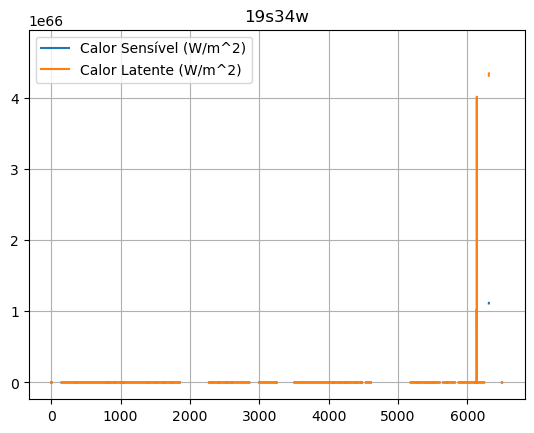

In [16]:
plt.plot(c_s, label = 'Calor Sensível (W/m^2)') # do ponto de vista atmosférico
plt.plot(c_l, label = 'Calor Latente (W/m^2)')
plt.legend()
plt.grid()
#plt.ylim(-5,15)
plt.title("19s34w")
#plt.savefig("19s34w.jpg")

: 

# Plota os fluxos de todas as boias


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    # Exemplo de nome de arquivo: "dados_boias_20s10w.csv"
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)# * (-1 if lat_dir == 's' else 1)
        lon = float(lon) #* (-1 if lon_dir == 'w' else 1)
        return lat, lon
    else:
        return None, None

def processar_e_gerar_grafico(caminho_arquivo, nome_saida):
    col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    # Extração de latitude e longitude do nome do arquivo
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    # Processamento dos dados
    v = np.array(da.mag_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    # Inicialização de variáveis dinâmicas
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)

    rol = [370] * len(da)
    t2 = np.arange(338, 338 + len(da))

    # Conversão para arrays numpy
    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    # Chamada à função coare36vn_zrf_et para cálculos
    a = coare36vn_zrf_et(ven, 2.29, temp_a, 2.29, umid, 2.29, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    # Extração de c_s e c_l da saída
    c_s = a[:,2]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et
    c_l = a[:,3]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et

    # Geração do gráfico
    plt.figure()
    plt.plot(c_s, label='Calor Sensível (W/m^2)')
    plt.plot(c_l, label='Calor Latente (W/m^2)')
    plt.legend()
    plt.grid()
    plt.title(nome_saida)
    plt.savefig(f"{nome_saida}.jpg")
    plt.close()

# Lista de pastas e arquivos para processamento
pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]
    # Adicione os demais caminhos conforme necessário

for caminho in pastas_arquivos:
    pasta = os.path.basename(os.path.dirname(caminho))
    processar_e_gerar_grafico(caminho, pasta)


/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5888/2952908629.py:381: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5888/2952908629.py:655: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5888/2952908629.py:618: RuntimeWarning: invalid value encountered in power
  wc_frac = 0.00073 * (U10N - 2) ** 1.43
/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value

# Plota todos os fluxos de calor latente das boias

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    # Exemplo de nome de arquivo: "dados_boias_20s10w.csv"
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_e_gerar_grafico(caminho_arquivo, nome_saida):
    col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    # Extração de latitude e longitude do nome do arquivo
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    # Processamento dos dados
    v = np.array(da.mag_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    # Inicialização de variáveis dinâmicas
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)

    rol = [370] * len(da)
    t2 = np.arange(338, 338 + len(da))

    # Conversão para arrays numpy
    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    # Suposição da existência de uma função coare36vn_zrf_et para cálculos (não fornecida aqui)
    a = coare36vn_zrf_et(ven, 2.29, temp_a, 2.29, umid, 2.29, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)

    # Extração de c_s e c_l da saída
    c_s = a[:,2]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et
    c_l = a[:,3]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et

    # Geração do gráfico para Calor Sensível
    plt.figure()
    plt.plot(c_s, label='Calor Sensível (W/m^2)')
    plt.legend()
    plt.grid()
    plt.title(f"Calor Sensível - {nome_saida}")
    plt.savefig(f"{nome_saida}_Calor_Sensivel.jpg")
    plt.close()

    # Geração do gráfico para Calor Latente
    plt.figure()
    plt.plot(c_l, label='Calor Latente (W/m^2)')
    plt.legend()
    plt.grid()
    plt.title(f"Calor Latente - {nome_saida}")
    plt.savefig(f"{nome_saida}_Calor_Latente.jpg")
    plt.close()
    
# Lista de pastas e arquivos para processamento
pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]
    # Adicione os demais caminhos conforme necessário

for caminho in pastas_arquivos:
    pasta = os.path.basename(os.path.dirname(caminho))
    processar_e_gerar_grafico(caminho, pasta)

/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5888/2952908629.py:381: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5888/2952908629.py:655: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5888/2952908629.py:618: RuntimeWarning: invalid value encountered in power
  wc_frac = 0.00073 * (U10N - 2) ** 1.43
/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    # Exemplo de nome de arquivo: "dados_boias_20s10w.csv"
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_e_gerar_grafico(caminho_arquivo, nome_saida):
    col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    # Extração de latitude e longitude do nome do arquivo
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    # Processamento dos dados
    v = np.array(da.mag_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    # Inicialização de variáveis dinâmicas
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)

    rol = [370] * len(da)
    t2 = np.arange(338, 338 + len(da))

    # Conversão para arrays numpy
    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    # Suposição da existência de uma função coare36vn_zrf_et para cálculos (não fornecida aqui)
    a = coare36vn_zrf_et(ven, 2.29, temp_a, 2.29, umid, 2.29, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)

    # Extração de c_s e c_l da saída
    c_s = a[:,2]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et
    c_l = a[:,3]  # Ajuste conforme a estrutura de dados retornada por coare36vn_zrf_et

    # Geração da figura com dois subplots
    plt.figure(figsize=(10, 8))

    # Subplot para Calor Sensível
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
    plt.plot(c_s, label='Calor Sensível (W/m^2)')
    plt.legend()
    plt.grid()
    plt.title(f"Calor Sensível - {nome_saida}")

    # Subplot para Calor Latente
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
    plt.plot(c_l, label='Calor Latente (W/m^2)')
    plt.legend()
    plt.grid()
    plt.title(f"Calor Latente - {nome_saida}")

    plt.tight_layout()
    plt.savefig(f"{nome_saida}_Calores.jpg")
    plt.close()

# Lista de pastas e arquivos para processamento
pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]

for caminho in pastas_arquivos:
    pasta = os.path.basename(os.path.dirname(caminho))
    processar_e_gerar_grafico(caminho, pasta)


/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5888/2952908629.py:381: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5888/2952908629.py:655: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5888/2952908629.py:618: RuntimeWarning: invalid value encountered in power
  wc_frac = 0.00073 * (U10N - 2) ** 1.43
/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value

# Plota calor latente e sensível de cada boia na mesma figura

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    v = np.array(da.mag_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    rol = [370] * len(da)
    t2 = np.arange(338, 338 + len(da))

    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    a = coare36vn_zrf_et(ven, 2.29, temp_a, 2.29, umid, 2.29, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]

    return c_s, c_l

def gerar_graficos(calores_sensivel, calores_latente):
    # Gráfico para Calor Sensível
    plt.figure(figsize=(10, 6))
    for cs in calores_sensivel:
        plt.plot(cs)
    plt.title("Calor Sensível (W/m^2)")
    plt.xlabel("Amostra")
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.grid(True)
    plt.legend([f"Arquivo {i+1}" for i in range(len(calores_sensivel))], loc="best")
    plt.savefig("Calor_Sensivel_Total.jpg")
    plt.close()

    # Gráfico para Calor Latente
    plt.figure(figsize=(10, 6))
    for cl in calores_latente:
        plt.plot(cl)
    plt.title("Calor Latente (W/m^2)")
    plt.xlabel("Amostra")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.grid(True)
    plt.legend([f"Arquivo {i+1}" for i in range(len(calores_latente))], loc="best")
    plt.savefig("Calor_Latente_Total.jpg")
    plt.close()

calores_sensivel = []
calores_latente = []

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]

for caminho in pastas_arquivos:
    c_s, c_l = processar_dados(caminho)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)

gerar_graficos(calores_sensivel, calores_latente)


/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5888/2952908629.py:381: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5888/2952908629.py:655: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5888/2952908629.py:618: RuntimeWarning: invalid value encountered in power
  wc_frac = 0.00073 * (U10N - 2) ** 1.43
/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value

# Plota uma figura pro calor latente e outra pro sensível 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data","temp_ar",'tsm','umidade','Chuva','rad','salinidade','dir_ven',"press",'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    v = np.array(da.mag_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    rol = [370] * len(da)
    t2 = np.arange(338, 338 + len(da))

    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    a = coare36vn_zrf_et(ven, 2.29, temp_a, 2.29, umid, 2.29, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]

    return c_s, c_l

def gerar_graficos(calores_sensivel, calores_latente, nomes_boias):
    # Gráfico para Calor Sensível
    plt.figure(figsize=(10, 6))
    for cs, nome_boia in zip(calores_sensivel, nomes_boias):
        plt.plot(cs, label=nome_boia)
    plt.title("Calor Sensível (W/m^2)")
    plt.xlabel("Amostra")
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig("Calor_Sensivel_Total.jpg", bbox_inches='tight')
    plt.close()

    # Gráfico para Calor Latente
    plt.figure(figsize=(10, 6))
    for cl, nome_boia in zip(calores_latente, nomes_boias):
        plt.plot(cl, label=nome_boia)
    plt.title("Calor Latente (W/m^2)")
    plt.xlabel("Amostra")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig("Calor_Latente_Total.jpg", bbox_inches='tight')
    plt.close()

calores_sensivel = []
calores_latente = []
nomes_boias = []

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(os.path.dirname(caminho))
    nomes_boias.append(nome_boia)
    c_s, c_l = processar_dados(caminho)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)

gerar_graficos(calores_sensivel, calores_latente, nomes_boias)


/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5888/2952908629.py:381: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5888/2952908629.py:655: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5888/2952908629.py:618: RuntimeWarning: invalid value encountered in power
  wc_frac = 0.00073 * (U10N - 2) ** 1.43
/tmp/ipykernel_5888/2952908629.py:378: DeprecationWarning: The truth value

# Com datatime

### Horário

/tmp/ipykernel_5597/2130168867.py:325: RuntimeWarning: divide by zero encountered in divide
  gf = ut / du
/tmp/ipykernel_5597/2130168867.py:656: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5597/2130168867.py:375: RuntimeWarning: invalid value encountered in power
  zoq = np.minimum(0.00016,5.8e-05 / rr ** 0.72)
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] 

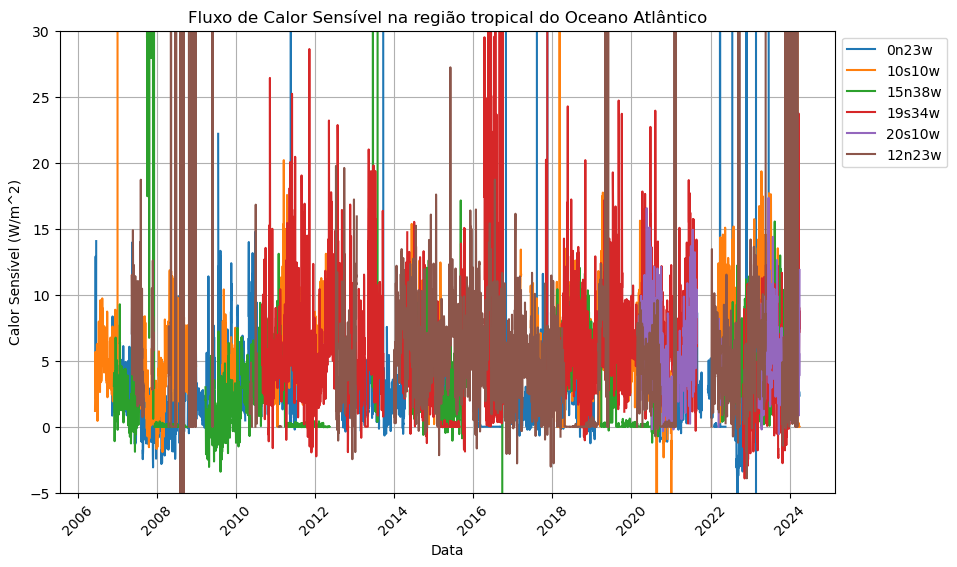

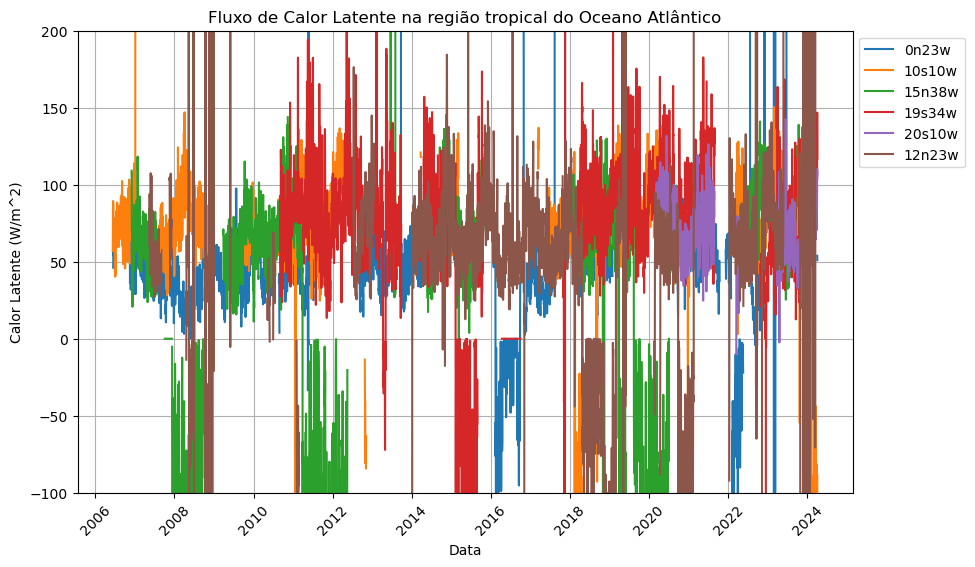

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'dir_ven', "press"]
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)
    #print(da)
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')

    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    #rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))

    lon = np.array(lon)
    lat = np.array(lat)
    #rol = np.array(rol)
    t2 = np.array(t2)

    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]

    return datas, c_s, c_l


def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    # Gráfico para Calor Sensível
    plt.figure(figsize=(10, 6))
    for data, cs, nome_boia in zip(datas, calores_sensivel, nomes_boias):
        plt.plot(data, cs, label=nome_boia)
    plt.ylim(-5,30)
    plt.title("Fluxo de Calor Sensível na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    #plt.savefig("Calor_Sensivel_Total.jpg", bbox_inches='tight')
    plt.show()

    # Gráfico para Calor Latente
    plt.figure(figsize=(10, 6))
    for data, cl, nome_boia in zip(datas, calores_latente, nomes_boias):
        plt.plot(data, cl, label=nome_boia)
    plt.ylim(-100,200)
    plt.title("Fluxo de Calor Latente na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    #plt.savefig("Calor_Latente_Total.jpg", bbox_inches='tight')
    plt.show()

datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []
dados_processados = []

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/19s34w.csv",
    #"/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20s10w.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/12n23w.csv",
]

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    lat, lon = extrair_lat_lon(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))
# Certifique-se de que todos os conjuntos de dados têm a mesma quantidade de datas antes de chamar esta função
gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

# Criação de um DataFrame a partir dos dados_processados
colunas = ['Nome da Boia', 'Latitude', 'Longitude', 'Data', 'Calor Sensível (W/m^2)', 'Calor Latente (W/m^2)']
dados_para_csv = []

for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])

df = pd.DataFrame(dados_para_csv, columns=colunas)

# Salvando os dados em um arquivo CSV
#caminho_arquivo_csv = "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/fluxos_calculados.csv"
#df.to_csv(caminho_arquivo_csv, index=False)
#print(f"Dados salvos em {caminho_arquivo_csv}")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'dir_ven', "press", "mag_ven"]
    da = pd.read_csv(caminho_arquivo, names=col, header=0)
    print(da)
    #da.columns = col
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')

    v = np.array(da.dir_ven)
    ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    #rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))

    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    a = coare36vn_zrf_et(ven, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]

    return datas, c_s, c_l

def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    plt.figure(figsize=(10, 6))
    for data, cs, nome_boia in zip(datas, calores_sensivel, nomes_boias):
        plt.plot(data, cs, label=nome_boia)
    #plt.ylim(-5,25)
    plt.title("Fluxo de Calor Sensível na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

    plt.figure(figsize=(10, 6))
    for data, cl, nome_boia in zip(datas, calores_latente, nomes_boias):
        plt.plot(data, cl, label=nome_boia)
    #plt.ylim(-50,155)
    plt.title("Fluxo de Calor Latente na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/0n23w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/10s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/15n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/19s34w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/12n23w_combinado.csv",
]

datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])

#df = pd.DataFrame(dados_para_csv, columns=['Nome da Boia', 'Latitude', 'Longitude', 'Data', 'Calor Sensível (W/m^2)', 'Calor Latente (W/m^2)'])
#caminho_arquivo_csv = "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/fluxos_calculados.csv"
#df.to_csv(caminho_arquivo_csv, index=False)
#print(f"Dados salvos em {caminho_arquivo_csv}")


                     data  temp_ar    tsm  umidade  Chuva    rad  rad_lon  \
0     2006-06-14 12:00:00     27.6  28.22     80.4   0.00  251.7    402.6   
1     2006-06-15 12:00:00     27.1  28.35     82.7   0.14  145.6    399.5   
2     2006-06-16 12:00:00     25.8  28.07     87.8   5.50   41.6    403.3   
3     2006-06-17 12:00:00     27.1  28.20     77.5   0.00  204.6    409.4   
4     2006-06-18 12:00:00     27.5  28.47     76.3   0.00  306.1    405.5   
...                   ...      ...    ...      ...    ...    ...      ...   
6497  2024-03-28 12:00:00     26.1  27.63     86.6   1.60  272.5      NaN   
6498  2024-03-29 12:00:00     26.7  27.65     83.0   0.00  245.7      NaN   
6499  2024-03-30 12:00:00     25.9  27.38     88.6   0.30  122.0      NaN   
6500  2024-03-31 12:00:00     27.0  27.45     85.2   0.00  252.8    442.3   
6501  2024-04-01 12:00:00     27.0  27.44     85.0   0.00  264.4    432.8   

      salinidade  dir_ven   press  mag_ven  
0          35.80      1.7  101

/tmp/ipykernel_5597/2130168867.py:325: RuntimeWarning: divide by zero encountered in divide
  gf = ut / du
/tmp/ipykernel_5597/2130168867.py:656: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5597/2130168867.py:386: RuntimeWarning: invalid value encountered in log
  cdhf = v

NameError: name 'dados_processados' is not defined

/tmp/ipykernel_5597/2130168867.py:325: RuntimeWarning: divide by zero encountered in divide
  gf = ut / du
/tmp/ipykernel_5597/2130168867.py:656: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5597/2130168867.py:386: RuntimeWarning: invalid value encountered in log
  cdhf = v

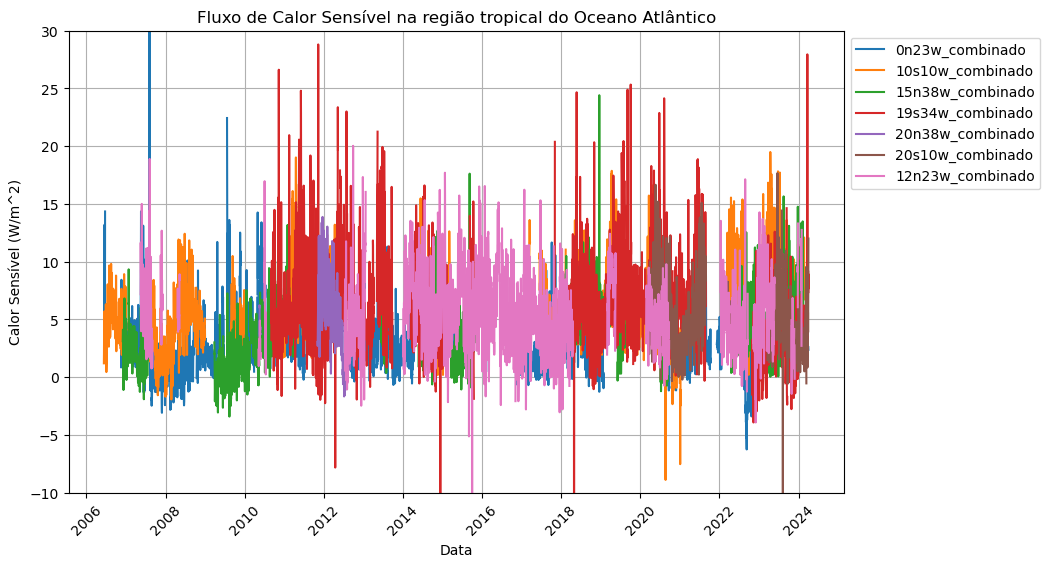

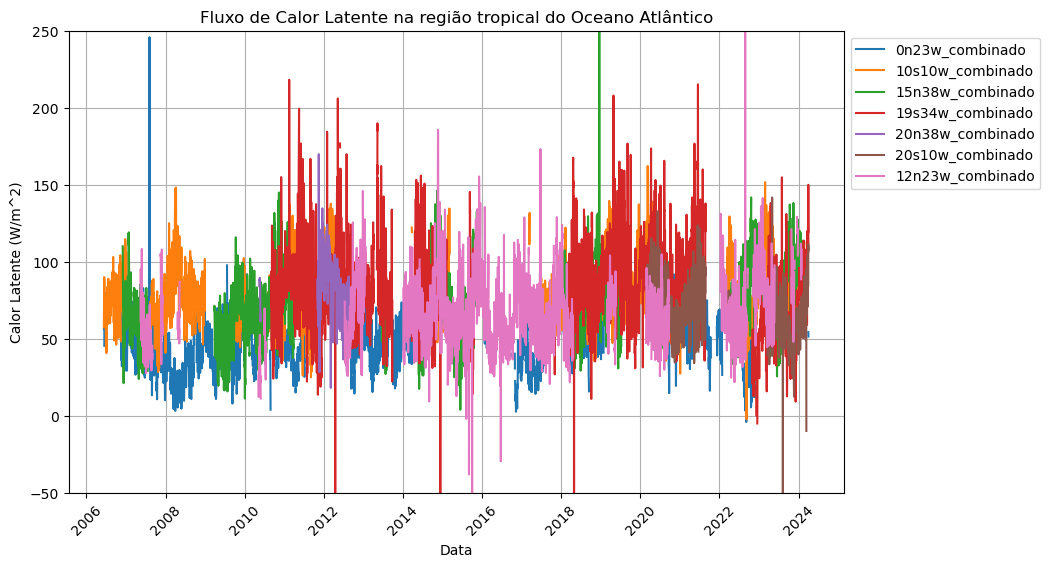

Dados salvos em /home/leticia/Documentos/MESTRADO/Dados_diarios_boias/fluxos_lat_sen_COARE3.6.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'dir_ven', "press", "mag_ven"]
    da = pd.read_csv(caminho_arquivo, names=col, header=0)
    #print(da)
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))
    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')
    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    #rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))
    lon = np.array(lon)
    lat = np.array(lat)
    #rol = np.array(rol)
    t2 = np.array(t2)
    # The function coare36vn_zrf_et seems to be a placeholder here, ensure you define or import this function as well.
    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 1000, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]
    return datas, c_s, c_l

def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    plt.figure(figsize=(10, 6))
    for data, cs, nome_boia in zip(datas, calores_sensivel, nomes_boias):
        plt.plot(data, cs, label=nome_boia)
    plt.title("Fluxo de Calor Sensível na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylim(-10,30)
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()
    plt.figure(figsize=(10, 6))
    for data, cl, nome_boia in zip(datas, calores_latente, nomes_boias):
        plt.plot(data, cl, label=nome_boia)
    plt.title("Fluxo de Calor Latente na região tropical do Oceano Atlântico")
    plt.ylim(-50,250)
    plt.xlabel("Data")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/0n23w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/10s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/15n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/19s34w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/12n23w_combinado.csv",
]

dados_processados = []  # Initialize here
datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])

df = pd.DataFrame(dados_para_csv, columns=['Nome da Boia', 'Latitude', 'Longitude', 'Data', 'Calor Sensível (W/m^2)', 'Calor Latente (W/m^2)'])
caminho_arquivo_csv = "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/fluxos_lat_sen_COARE3.6.csv"
df.to_csv(caminho_arquivo_csv, index=False)
print(f"Dados salvos em {caminho_arquivo_csv}")

### salvando as figuras separadamente

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None


def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'dir_ven', "press", "mag_ven"]
    da = pd.read_csv(caminho_arquivo, names=col, header=0)
    #print(da)
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))
    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')
    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    #rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))
    lon = np.array(lon)
    lat = np.array(lat)
    #rol = np.array(rol)
    t2 = np.array(t2)
    # The function coare36vn_zrf_et seems to be a placeholder here, ensure you define or import this function as well.
    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 1000, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]
    return datas, c_s, c_l

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    for idx, nome_boia in enumerate(nomes_boias):
        # Plotar e salvar o gráfico de Calor Sensível
        plt.figure(figsize=(10, 6))
        plt.plot(datas[idx], calores_sensivel[idx], label=nome_boia)
        plt.title(f"Fluxo de Calor Sensível para {nome_boia}")
        plt.xlabel("Data")
        plt.ylim(-10, 30)
        plt.ylabel("Calor Sensível (W/m^2)")
        plt.xticks(rotation=45)
        plt.grid(True)
        #plt.gca().set_xlim([mdates.date2num(pd.Timestamp('2006-01-01')), mdates.date2num(pd.Timestamp('2024-12-31'))])
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.legend(loc='upper left')
        plt.savefig(f"{nome_boia}_calor_sensivel.png")
        plt.close()

        # Plotar e salvar o gráfico de Calor Latente
        plt.figure(figsize=(10, 6))
        plt.plot(datas[idx], calores_latente[idx], label=nome_boia)
        plt.title(f"Fluxo de Calor Latente para {nome_boia}")
        plt.ylim(-10, 250)
        plt.xlabel("Data")
        plt.ylabel("Calor Latente (W/m^2)")
        plt.xticks(rotation=45)
        plt.grid(True)
        #plt.gca().set_xlim([mdates.date2num(pd.Timestamp('2006-01-01')), mdates.date2num(pd.Timestamp('2024-12-31'))])
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.legend(loc='upper left')
        plt.savefig(f"{nome_boia}_calor_latente.png")
        plt.close()


pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/0n23w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/10s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/15n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/19s34w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20n38w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/20s10w_combinado.csv",
    "/home/leticia/Documentos/MESTRADO/Dados_diarios_boias/12n23w_combinado.csv",
]

dados_processados = []  # Initialize here
datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])
datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])

/tmp/ipykernel_5597/2130168867.py:325: RuntimeWarning: divide by zero encountered in divide
  gf = ut / du
/tmp/ipykernel_5597/2130168867.py:656: RuntimeWarning: invalid value encountered in power
  psi = - ((1 + 0.6667 * zeta) ** 1.5 + np.multiply(0.6667 * (zeta - 14.28),np.exp(- dzeta)) + 8.525)
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5597/2130168867.py:386: RuntimeWarning: invalid value encountered in log
  cdhf = v

### Mensal

/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is

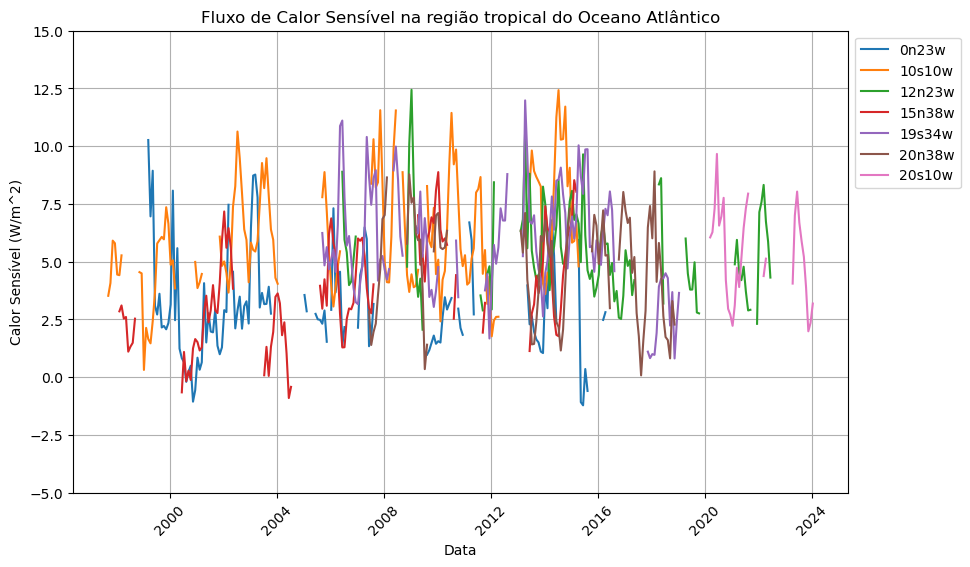

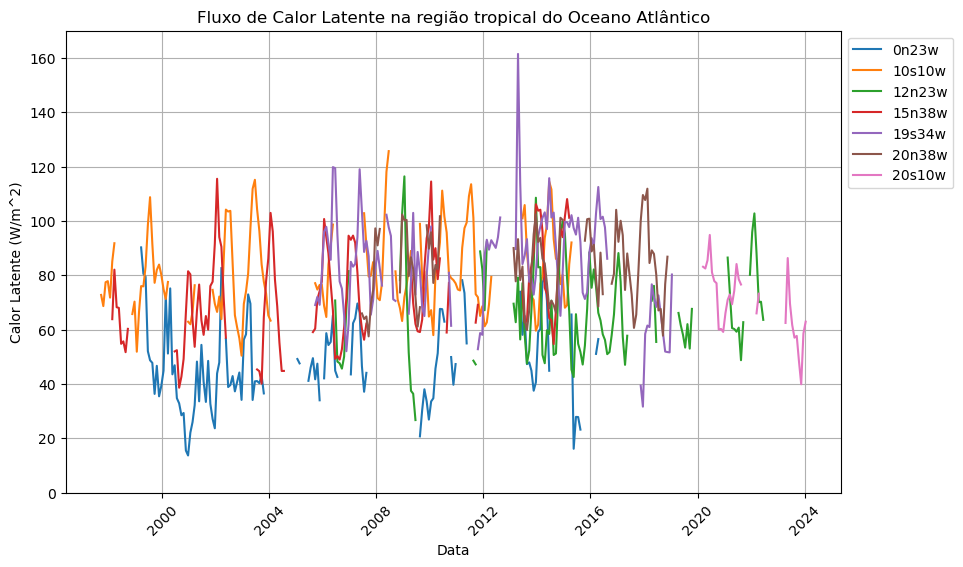

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'salinidade', 'dir_ven', "press", 'mag_ven']
    da = pd.read_csv(caminho_arquivo, names=col, skiprows=1)

    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))

    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')

    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)

    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))

    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)

    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 1000, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]

    return datas, c_s, c_l

def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    # Gráfico para Calor Sensível
    plt.figure(figsize=(10, 6))
    for data, cs, nome_boia in zip(datas, calores_sensivel, nomes_boias):
        plt.plot(data, cs, label=nome_boia)
    plt.ylim(-5,15)
    plt.title("Fluxo de Calor Sensível na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Sensível (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    #plt.savefig("Calor_Sensivel_Total.jpg", bbox_inches='tight')
    plt.show()

    # Gráfico para Calor Latente
    plt.figure(figsize=(10, 6))
    for data, cl, nome_boia in zip(datas, calores_latente, nomes_boias):
        plt.plot(data, cl, label=nome_boia)
    plt.ylim(0,170)
    plt.title("Fluxo de Calor Latente na região tropical do Oceano Atlântico")
    plt.xlabel("Data")
    plt.ylabel("Calor Latente (W/m^2)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    #plt.savefig("Calor_Latente_Total.jpg", bbox_inches='tight')
    plt.show()

datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []
dados_processados = []

pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]


for caminho in pastas_arquivos:
    nome_boia = os.path.basename(os.path.dirname(caminho))
    nomes_boias.append(nome_boia)
    lat, lon = extrair_lat_lon(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))
# Certifique-se de que todos os conjuntos de dados têm a mesma quantidade de datas antes de chamar esta função
gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def extrair_lat_lon(nome_arquivo):
    """Extrai a latitude e a longitude do nome do arquivo."""
    match = re.search(r"(\d+)([ns])(\d+)([ew])", nome_arquivo)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat)
        lon = float(lon)
        return lat, lon
    else:
        return None, None

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'rad_lon', 'salinidade', 'dir_ven', "press", "mag_ven"]
    da = pd.read_csv(caminho_arquivo, names=col, header=0)
    #print(da)
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))
    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')
    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    #rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))
    lon = np.array(lon)
    lat = np.array(lat)
    #rol = np.array(rol)
    t2 = np.array(t2)
    # The function coare36vn_zrf_et seems to be a placeholder here, ensure you define or import this function as well.
    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 1000, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]
    return datas, c_s, c_l

def processar_dados(caminho_arquivo):
    col = ["data", "temp_ar", 'tsm', 'umidade', 'Chuva', 'rad', 'salinidade', 'dir_ven', "press", "mag_ven"]
    da = pd.read_csv(caminho_arquivo, names=col, header=0)
    #print(da)
    lat_val, lon_val = extrair_lat_lon(os.path.basename(caminho_arquivo))
    datas = pd.to_datetime(da['data'], format='%Y-%m-%d %H:%M:%S')
    v = np.array(da.dir_ven)
    #ven = v / 1.94
    temp_a = np.array(da.temp_ar)
    umid = np.array(da.umidade)
    pre = np.array(da.press)
    sst = np.array(da.tsm)
    sa = np.array(da.salinidade)
    ch = np.array(da.Chuva)
    roc = np.array(da.rad)
    #rol= np.array(da.rad_lon)
    lon = [lon_val] * len(da)
    lat = [lat_val] * len(da)
    rol = [370] * len(da)
    t2 = np.arange(1, 1 + len(da))
    lon = np.array(lon)
    lat = np.array(lat)
    rol = np.array(rol)
    t2 = np.array(t2)
    # The function coare36vn_zrf_et seems to be a placeholder here, ensure you define or import this function as well.
    a = coare36vn_zrf_et(v, 4, temp_a, 3, umid, 3, pre, sst, roc, rol, lat, lon, t2, 600, ch, sa, cp=None, sigH=None, zrf_u=10.0, zrf_t=10.0, zrf_q=10.0)
    c_s = a[:,2]
    c_l = a[:,3]
    return datas, c_s, c_l

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias):
    for idx, nome_boia in enumerate(nomes_boias):
        # Plotar e salvar o gráfico de Calor Sensível
        plt.figure(figsize=(10, 6))
        plt.plot(datas[idx], calores_sensivel[idx], label=nome_boia)
        plt.title(f"Fluxo de Calor Sensível para {nome_boia}")
        plt.xlabel("Data")
        plt.ylim(-5, 15)
        plt.ylabel("Calor Sensível (W/m^2)")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.gca().set_xlim([mdates.date2num(pd.Timestamp('1997-01-01')), mdates.date2num(pd.Timestamp('2024-12-31'))])
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.legend(loc='upper left')
        plt.savefig(f"{nome_boia}_calor_sensivel.png")
        plt.close()

        # Plotar e salvar o gráfico de Calor Latente
        plt.figure(figsize=(10, 6))
        plt.plot(datas[idx], calores_latente[idx], label=nome_boia)
        plt.title(f"Fluxo de Calor Latente para {nome_boia}")
        plt.ylim(-1, 150)
        plt.xlabel("Data")
        plt.ylabel("Calor Latente (W/m^2)")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.gca().set_xlim([mdates.date2num(pd.Timestamp('1997-01-01')), mdates.date2num(pd.Timestamp('2024-12-31'))])
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.legend(loc='upper left')
        plt.savefig(f"{nome_boia}_calor_latente.png")
        plt.close()


pastas_arquivos = [
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/0n23w/dados_boias_0n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/10s10w/dados_boias_10s10w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/12n23w/dados_boias_12n23w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/15n38w/dados_boias_15n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/19s34w/dados_boias_19s34w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20n38w/dados_boias_20n38w.csv",
    "/home/leticia/Documentos/MESTRADO/quali/Dados/figuras/20s10w/dados_boias_20s10w.csv",
]

dados_processados = []  # Initialize here
datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])
datas = []
calores_sensivel = []
calores_latente = []
nomes_boias = []

for caminho in pastas_arquivos:
    nome_boia = os.path.basename(caminho).split('.')[0]
    nomes_boias.append(nome_boia)
    data, c_s, c_l = processar_dados(caminho)
    lat, lon = extrair_lat_lon(nome_boia)
    datas.append(data)
    calores_sensivel.append(c_s)
    calores_latente.append(c_l)
    dados_processados.append((nome_boia, lat, lon, data, c_s, c_l))

gerar_graficos(datas, calores_sensivel, calores_latente, nomes_boias)

dados_para_csv = []
for nome_boia, lat, lon, data, c_s, c_l in dados_processados:
    for i in range(len(data)):
        dados_para_csv.append([nome_boia, lat, lon, data[i], c_s[i], c_l[i]])

/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(2.5,rr[iice]) <= 1000))
/tmp/ipykernel_5597/2130168867.py:379: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  ik = np.array(np.where(rr[iice] > np.logical_and(0.135,rr[iice]) <= 2.5))
/tmp/ipykernel_5597/2130168867.py:382: DeprecationWarning: The truth value of an empty array is